# <span style="color:orangered"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:gold"> Lezione 4</span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Unità di Lennard-Jones

Ogni stato (solido, liquido, gas) in cui le paticelle interagiscono attraverso un potenziale di Lennard-Jones può essere simulato in unità di misura "universali" (qui chiamate Unità di Lennard-Jones).
Da esse possono essere ricavati i risultati per un qualunqe elemento reale semplicemente riscalando i risultati finali con delle costanti caratteristiche dell'elemento.
Inoltre, le grandezze fisiche in unità di LJ hanno di norma un ordine di grandezza O(1) ed è dunque più immediato riscontrare anomalie nei risultati della simulazione. 

Di seguito è riportato l'andamento di temperatura, energia cinetica, energia potenziale, energia totale e pressione durante la simulazione di $N_{part} = 108$ particelle in fase liquida, in $N_{step}=10^4$ passi e con una risoluzione $\delta=0.0005$.

I parametri iniziali (in unità di Lennard-Jones) sono i seguenti:
- $\rho^\star = 0.8$
- $T^\star = 1.1$ 
- $cut-off radius: r_c = 2.5$

La configurazione iniziale delle particelle non può essere generata casualmente, poichè c'è il rischio che si verifichino sovrapposizioni tra alcune particelle.
Se due particelle dovessero trovarsi ad una distanza $r \xrightarrow {} 0$, il potenziale di Lennard - Jones crescerebbe con una potenza $r^{-12}$ e le due particelle subirebbero un'intensa forza repulsiva che, in assenza di condizioni al contorno, le porterebbe ad allontanarsi oltre al box da noi considerato.

Un modo per evitare i rischi che comporta l'inizializzazione casuale del sistema consiste nella scelta di una configurazione cristallina e perfettamente ordinata, nel nostro caso un cristallo $FCC$.
Tuttavia anche questa scelta comporta alcuni svantaggi, in quanto il sistema si trova naturalmente in un reticolo cristallino solo in fase solida, e dunque a basse temperature.
Nella fase liquida e gassosa si può raggiungere la temperatura desiderata dopo pochi step assegnando una temperatura iniziale più alta per bilanciare la tendenza della struttura cristallina ad abbassare la propria temperatura.

La scelta migliore per la configurazione iniziale potrebbe quindi essere la configurazione finale di una simulazione precedente: non ci sarebbero rischi di sovrapposizione e il sistema partirebbe da una temperatura simile a quella desiderata.

Il procedimento utilizzato è il seguente:
1. Alla prima iterazione le particelle si trovano in una struttura cristallina e la temperatura iniziale che viene fornita è pari a quella desiderata.
2. Per le successive iterazioni, il sistema parte dall'ultima struttura spaziale della simulazione precedente e si esegue un *riscalamento della temperatura*:
    - dall'ultima simulazione si ricavano l'ultima e la penultima configurazione spaziale.
    - si esegue un una "mossa" dell'algoritmo di Verlet, calcolando così la velocità e la nuova posizione
    - si misura l'energia cinetica del sistema e dal confronto con la $T^*$ desiderata si ricava il fattore di scala: $f_s = \sqrt{ \frac{ 3 T^* }{E_{kin}} }$
    - le velocità vengono riscalate con il fattore $f_s$
    - viene ricalcolata l'ultima configurazione spaziale con le nuove velocità
    - attraverso l'algoritmo di Verlet si trovano tutte le posizioni successive
    
Nella fase liquida la temperatura $T^*$ viene raggiunta dopo poche iterazioni (circa 4-5), mentre per la fase gassosa (vedi gas reali) la temperatura continua ad oscillare dopo numerose simulazioni.

Di seguito vengono riportati i risultati dopo 10 simulazioni con riscalamento della temperatura nella fase liquida in unità di Lennard Jones.
È presente anche un grafico della temperatura finale raggiunta da ogni simulazione per avere una stima della bontà dell'algoritmo di riscalamento della temperatura.

**Nota:** è fondamentale applicare le condizioni al contorno anche nella fase di riscalamento della temperatura, altrimenti il processo potrebbe non convergere!

### Temperatura

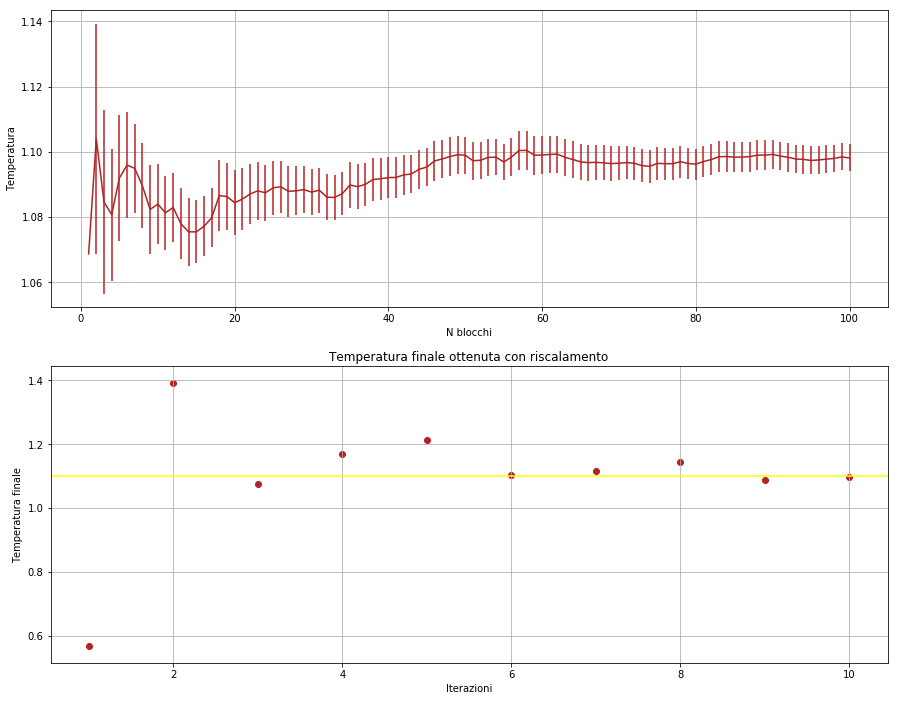

In [24]:
fig=plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
N_blocchi, temp, error = np.loadtxt(r"Data/liquid/LJUnits/ave_temp.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi, temp, yerr=error, color='firebrick')
plt.xlabel('N blocchi')
plt.ylabel('Temperatura')
plt.grid(True)

plt.subplot(2,1,2)
t = np.loadtxt(r"Data/liquid/LJUnits/temp_prog.out", usecols=(0), delimiter=' ', unpack='true')
it = np.arange(1,11)
plt.scatter(it, t, color='firebrick')
plt.axhline(y=1.1, color='yellow')
plt.title('Temperatura finale ottenuta con riscalamento')
plt.xlabel('Iterazioni')
plt.ylabel('Temperatura finale')
plt.grid(True)

plt.show()

### energia cinetica

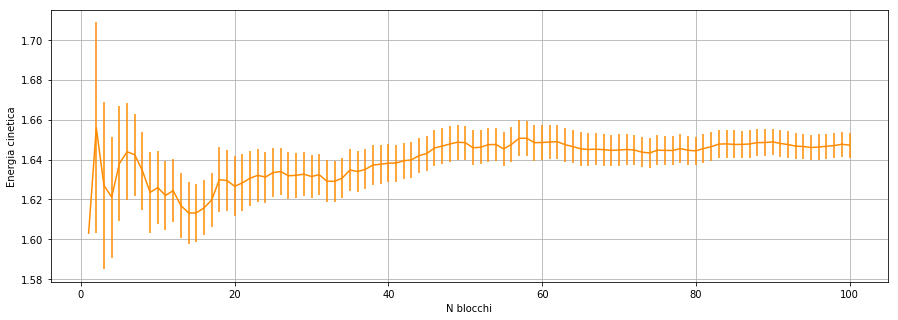

In [25]:
fig=plt.figure(figsize=(15,5))

N_blocchi, ekin, errork = np.loadtxt(r"Data/liquid/LJUnits/ave_kin.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi, ekin, yerr=errork, color='darkorange')
plt.xlabel('N blocchi')
plt.ylabel('Energia cinetica')

plt.grid(True)
plt.show()

### energia potenziale

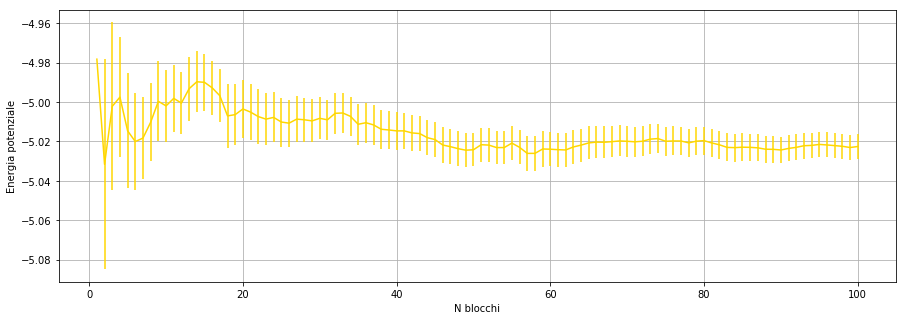

In [26]:
fig=plt.figure(figsize=(15,5))

N_blocchi, epot, errorp = np.loadtxt(r"Data/liquid/LJUnits/ave_pot.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi, epot, yerr=errorp, color='gold')
plt.xlabel('N blocchi')
plt.ylabel('Energia potenziale')

plt.grid(True)
plt.show()

### energia totale

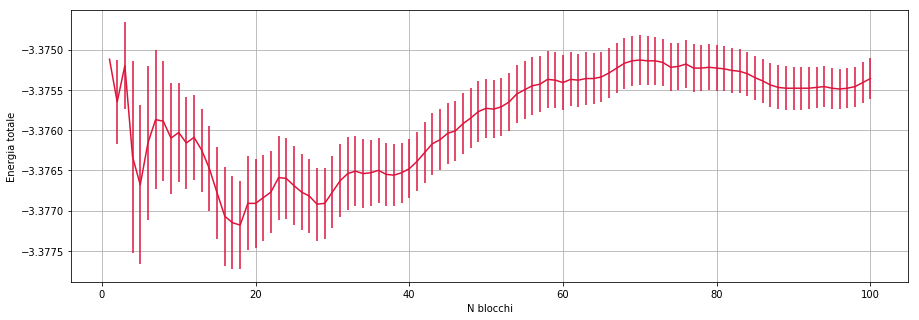

In [33]:
fig=plt.figure(figsize=(15,5))

N_blocchi, etot, errort = np.loadtxt(r"Data/liquid/LJUnits/ave_etot.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi, etot, yerr=errort, color='crimson')
plt.xlabel('N blocchi')
plt.ylabel('Energia totale')

plt.grid(True)
plt.show()

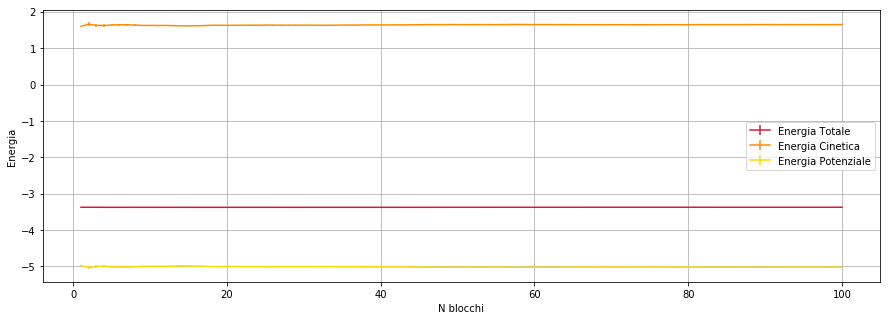

In [34]:
fig=plt.figure(figsize=(15,5))

plt.errorbar(N_blocchi, etot, yerr=errort, color='crimson', label='Energia Totale')
plt.errorbar(N_blocchi, ekin, yerr=errork, color='darkorange', label='Energia Cinetica')
plt.errorbar(N_blocchi, epot, yerr=errorp, color='gold', label='Energia Potenziale')

plt.xlabel('N blocchi')
plt.ylabel('Energia')

plt.legend()
plt.grid(True)
plt.show()

*Osservazione:* in linea di principio, l'energia cinetica e l'energia potenziale sono libere di oscillare purchè la loro somma, l'energia totale, rimanga costante.

### Pressione

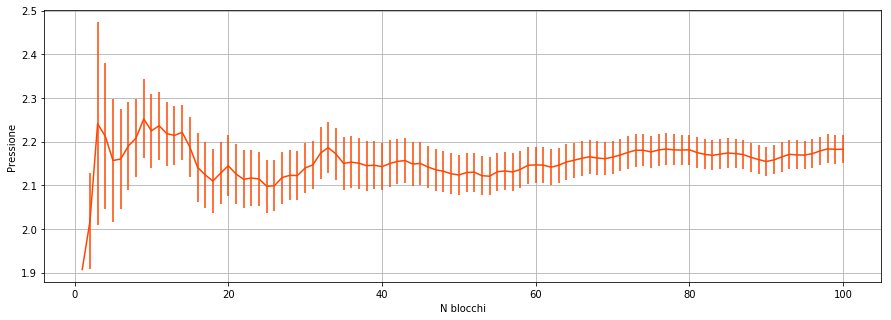

In [36]:
fig=plt.figure(figsize=(15,5))

N_blocchi, pres, error = np.loadtxt(r"Data/liquid/LJUnits/ave_pres.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi, pres, yerr=error, color='orangered')
plt.xlabel('N blocchi')
plt.ylabel('Pressione')

plt.grid(True)
plt.show()

## Elementi reali: Argon e Krypton

I risultati ottenuti in unità di Lennard-Jones sono universali, pertanto è sufficiente moltiplicare le grandezze ottenute per delle costanti proprie dell'elemento considerato.
Per entrambi gli elementi e per ciascuna fase è stato eseguito un processo indipendente di riscalamento della temperatura fino a raggiungere un equilibrio per la fase solida e liquida, mentre la fase gassosa continua ad oscillare risultando comunque accettabile. 
Siccome non è stata fatta alcuna distinzione per l'inizializzazione del generatore di numeri casuali, i due elementi presentano gli stessi grafici ma con valori diversi, a riprova dell'universalità delle unità di Lennard-Jones.

Le grandezze vengono riscalate con le seguenti costanti:
$$T = (\epsilon/k_B) T^* $$
$$E_{kin} = \epsilon E_{kin}^* $$
$$E_{pot} = \epsilon E_{pot}^* $$
$$P = \frac{\epsilon}{\sigma^3} P $$

Le costanti utilizzate sono: 
- Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu)
- Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu)

*Osservazione:* benchè sia fornito anche il valore della massa della singola particella, essa non contribuisce in alcun modo al riscalamento delle grandezze in unità del Sistema Internazionale

### Temperatura - Reale

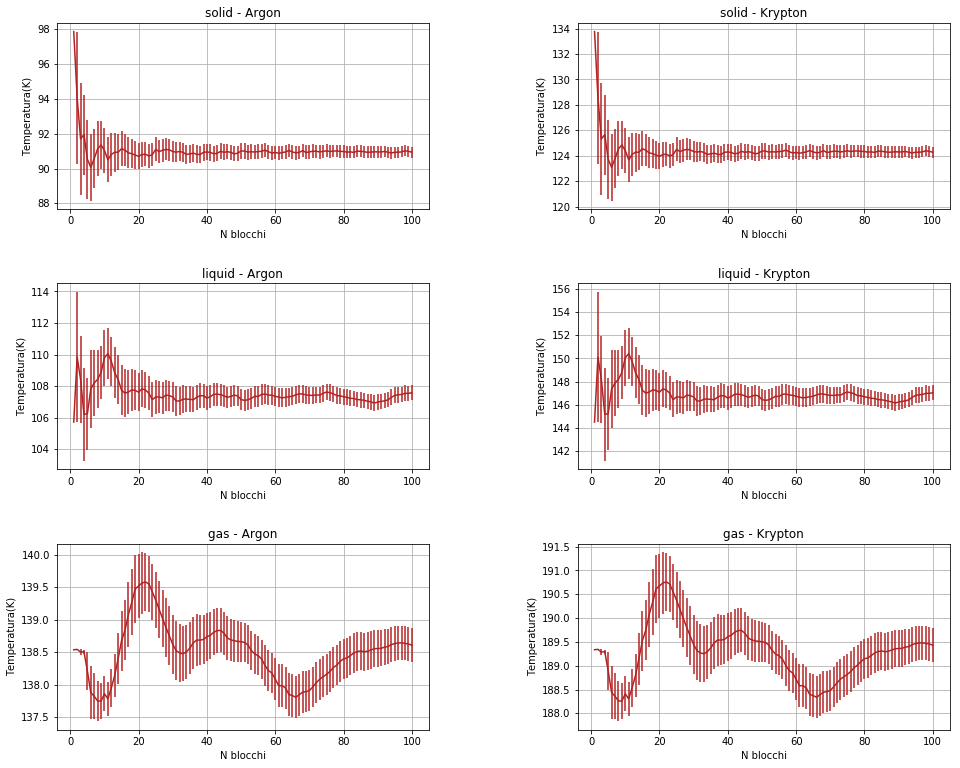

In [9]:
phase = ['solid', 'liquid', 'gas']
element = ['Argon', 'Krypton']

fig=plt.figure(figsize=(16, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.4)          #spazio tra due grafici vicini

i = 1
for ph in phase:
    for el in element:
        plt.subplot(3,2,i)                                         #n_colonne totali; n_righe totali; indice del grafico considerato
        filename = "Data/" + ph + "/" + el + "/ave_temp.out"
        N_blocchi, temp, error = np.loadtxt(filename, usecols=(0,1,2), delimiter=' ', unpack='true')
        plt.errorbar(N_blocchi,temp,yerr=error, color='firebrick')
        plt.xlabel('N blocchi')
        plt.ylabel('Temperatura(K)')
        plt.title(ph + ' - ' + el)
        plt.grid(True)
        i += 1

plt.show()

### Energia Cinetica - Reale

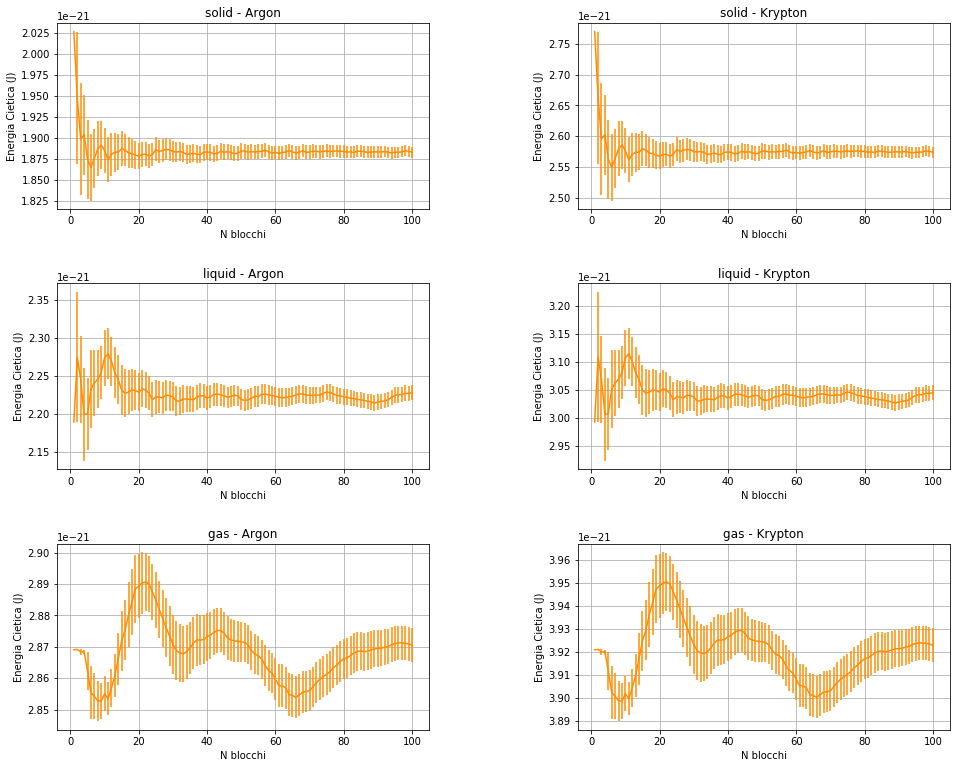

In [13]:
phase = ['solid', 'liquid', 'gas']
element = ['Argon', 'Krypton']

fig=plt.figure(figsize=(16, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.4)          #spazio tra due grafici vicini

i = 1
for ph in phase:
    for el in element:
        plt.subplot(3,2,i)                                         #n_colonne totali; n_righe totali; indice del grafico considerato
        filename = "Data/" + ph + "/" + el + "/ave_kin.out"
        N_blocchi, ekin, error = np.loadtxt(filename, usecols=(0,1,2), delimiter=' ', unpack='true')
        plt.errorbar(N_blocchi,ekin,yerr=error, color='darkorange')
        plt.xlabel('N blocchi')
        plt.ylabel('Energia Cietica (J)')
        plt.title(ph + ' - ' + el)
        plt.grid(True)
        i += 1

plt.show()

### Energia Potenziale - Reale

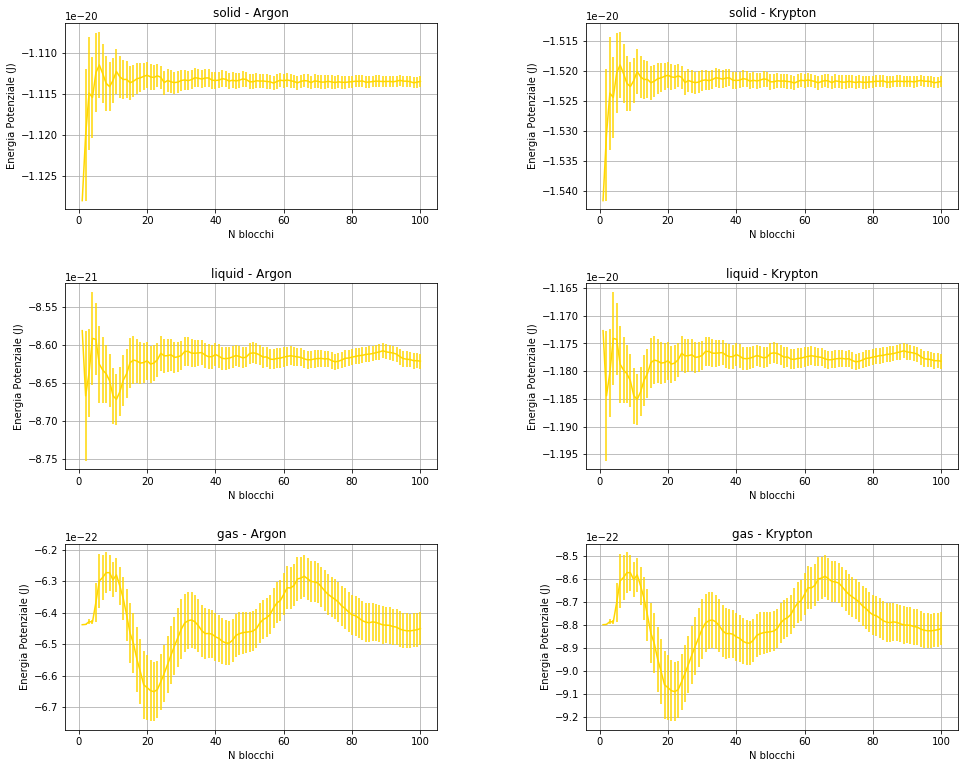

In [16]:
phase = ['solid', 'liquid', 'gas']
element = ['Argon', 'Krypton']

fig=plt.figure(figsize=(16, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.4)          #spazio tra due grafici vicini

i = 1
for ph in phase:
    for el in element:
        plt.subplot(3,2,i)                                         #n_colonne totali; n_righe totali; indice del grafico considerato
        filename = "Data/" + ph + "/" + el + "/ave_pot.out"
        N_blocchi, epot, error = np.loadtxt(filename, usecols=(0,1,2), delimiter=' ', unpack='true')
        plt.errorbar(N_blocchi,epot,yerr=error, color='gold')
        plt.xlabel('N blocchi')
        plt.ylabel('Energia Potenziale (J)')
        plt.title(ph + ' - ' + el)
        plt.grid(True)
        i += 1

plt.show()

### Energia Totale - Reale

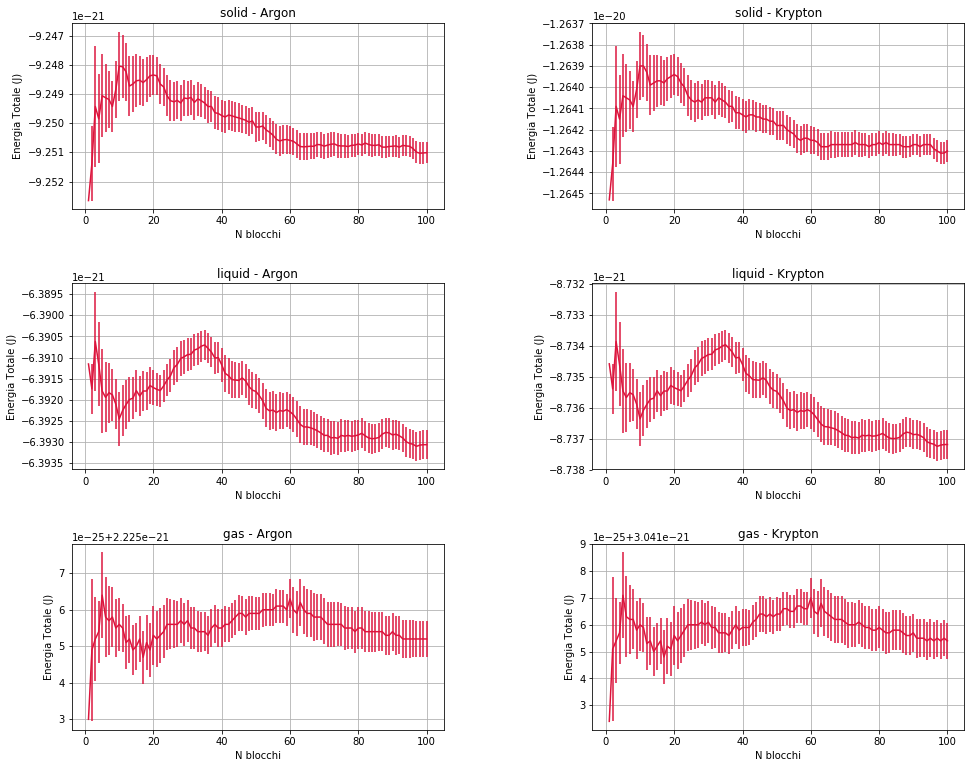

In [35]:
phase = ['solid', 'liquid', 'gas']
element = ['Argon', 'Krypton']

fig=plt.figure(figsize=(16, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.4)          #spazio tra due grafici vicini

i = 1
for ph in phase:
    for el in element:
        plt.subplot(3,2,i)                                         #n_colonne totali; n_righe totali; indice del grafico considerato
        filename = "Data/" + ph + "/" + el + "/ave_etot.out"
        N_blocchi, etot, error = np.loadtxt(filename, usecols=(0,1,2), delimiter=' ', unpack='true')
        plt.errorbar(N_blocchi,etot,yerr=error, color='crimson')
        plt.xlabel('N blocchi')
        plt.ylabel('Energia Totale (J)')
        plt.title(ph + ' - ' + el)
        plt.grid(True)
        i += 1

plt.show()

### Pressione - Reale

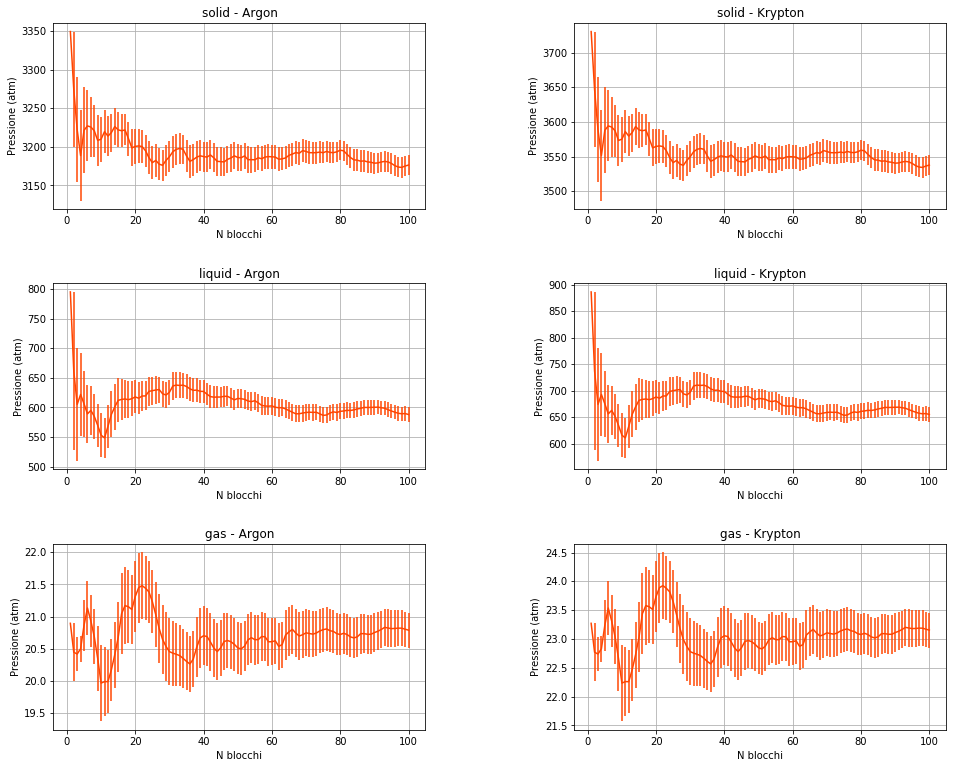

In [37]:
phase = ['solid', 'liquid', 'gas']
element = ['Argon', 'Krypton']

atm=1.01325e5

fig=plt.figure(figsize=(16, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.4)          #spazio tra due grafici vicini

i = 1
for ph in phase:
    for el in element:
        plt.subplot(3,2,i)                                         #n_colonne totali; n_righe totali; indice del grafico considerato
        filename = "Data/" + ph + "/" + el + "/ave_pres.out"
        N_blocchi, pres, error = np.loadtxt(filename, usecols=(0,1,2), delimiter=' ', unpack='true')
        pres = pres*(1./atm)
        error = error*(1./atm)
        plt.errorbar(N_blocchi,pres,yerr=error, color='orangered')
        plt.xlabel('N blocchi')
        plt.ylabel('Pressione (atm)')
        plt.title(ph + ' - ' + el)
        plt.grid(True)
        i += 1

plt.show()

*Osservazione:* il valore numerico della pressione nella fase gassosa dipende fortemente dalla temperatura e dunque oscilla vistosamente tra simulazioni diverse poichè la temperatura non risulta equilibrata.